# Election Data 2024
[Data](https://redistrictingdatahub.org/state/georgia/)

In [1]:
## Import libraries
import pandas as pd
pd.reset_option('display.max_columns')
pd.set_option('display.max_columns', None)  # or specify a number, e.g., 100
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
## Load Data
census_data = pd.read_csv('/Users/geoffrey/Downloads/ga_inc_2022_t/ga_inc_2022_t.csv')

In [3]:
census_data.head()

,GEOID,STATEFP,STATE,COUNTYFP,COUNTY,MEDN_INC22,TOT_HOUS22,LESS_10K22,10K_15K22,15K_20K22,20K_25K22,25K_30K22,30K_35K22,35K_40K22,40K_45K22,45K_50K22,50K_60K22,60K_75K22,75K_100K22,100_125K22,125_150K22,150_200K22,200K_MOR22
0,13027960200,13,Georgia,27,Brooks County,40625.0,550,56,25,7,61,70,37,15,48,11,50,55,31,26,21,14,23
1,13027960301,13,Georgia,27,Brooks County,65417.0,1238,158,82,12,116,81,13,38,14,3,66,210,95,130,59,87,74
2,13027960302,13,Georgia,27,Brooks County,49167.0,654,31,44,32,42,91,14,0,61,18,41,68,49,124,22,13,4
3,13027960400,13,Georgia,27,Brooks County,45000.0,1474,204,100,176,52,62,78,24,41,99,95,230,181,51,28,28,25
4,13027960500,13,Georgia,27,Brooks County,31071.0,1020,118,182,152,13,39,65,56,47,12,46,42,153,29,0,0,66


In [4]:
census_data['COUNTY'].value_counts()

 Fulton County        327
 Gwinnett County      220
 DeKalb County        203
 Cobb County          186
 Chatham County        88
                     ... 
 Warren County          2
 Taliaferro County      1
 Glascock County        1
 Clay County            1
 Quitman County         1
Name: COUNTY, Length: 159, dtype: int64

In [5]:
census_data.columns

Index(['GEOID', 'STATEFP', 'STATE', 'COUNTYFP', 'COUNTY', 'MEDN_INC22',
       'TOT_HOUS22', 'LESS_10K22', '10K_15K22', '15K_20K22', '20K_25K22',
       '25K_30K22', '30K_35K22', '35K_40K22', '40K_45K22', '45K_50K22',
       '50K_60K22', '60K_75K22', '75K_100K22', '100_125K22', '125_150K22',
       '150_200K22', '200K_MOR22'],
      dtype='object')

In [6]:
fulton_county_census_tracts = census_data[census_data['COUNTYFP']==121]
fulton_county_census_tracts.head()

,GEOID,STATEFP,STATE,COUNTYFP,COUNTY,MEDN_INC22,TOT_HOUS22,LESS_10K22,10K_15K22,15K_20K22,20K_25K22,25K_30K22,30K_35K22,35K_40K22,40K_45K22,45K_50K22,50K_60K22,60K_75K22,75K_100K22,100_125K22,125_150K22,150_200K22,200K_MOR22
773,13121000100,13,Georgia,121,Fulton County,154808.0,2458,31,12,163,279,177,0,15,12,0,44,81,225,129,40,351,899
774,13121000201,13,Georgia,121,Fulton County,120982.0,1220,13,0,24,0,45,0,0,0,0,44,177,88,236,132,46,415
775,13121000202,13,Georgia,121,Fulton County,182409.0,1681,39,15,13,0,0,14,0,0,0,55,78,140,88,328,96,815
776,13121000400,13,Georgia,121,Fulton County,127500.0,1064,21,0,35,10,0,21,14,0,48,58,58,127,112,78,191,291
777,13121000501,13,Georgia,121,Fulton County,103485.0,2416,122,74,0,0,84,46,44,42,62,206,169,284,462,127,96,598


In [7]:
fulton_county_census_tracts.dtypes

GEOID           int64
STATEFP         int64
STATE          object
COUNTYFP        int64
COUNTY         object
MEDN_INC22    float64
TOT_HOUS22      int64
LESS_10K22      int64
10K_15K22       int64
15K_20K22       int64
20K_25K22       int64
25K_30K22       int64
30K_35K22       int64
35K_40K22       int64
40K_45K22       int64
45K_50K22       int64
50K_60K22       int64
60K_75K22       int64
75K_100K22      int64
100_125K22      int64
125_150K22      int64
150_200K22      int64
200K_MOR22      int64
dtype: object

In [8]:
state_county = 13121000000

In [9]:
tract_numbers = [9504,9502,9501,9804,9803,9802,9900,10223,10211,10204,10222,10217,10213,10219,10215,10214,10218,11438,11437,11422,11423,11445,11446,11437]

In [10]:
district_53_tracts = [x + state_county for x in tract_numbers]

In [11]:
district_53_tracts

[13121009504,
 13121009502,
 13121009501,
 13121009804,
 13121009803,
 13121009802,
 13121009900,
 13121010223,
 13121010211,
 13121010204,
 13121010222,
 13121010217,
 13121010213,
 13121010219,
 13121010215,
 13121010214,
 13121010218,
 13121011438,
 13121011437,
 13121011422,
 13121011423,
 13121011445,
 13121011446,
 13121011437]

In [12]:
district_53_census_tracts = census_data[census_data['GEOID'].isin(district_53_tracts)]
district_53_census_tracts.head()

,GEOID,STATEFP,STATE,COUNTYFP,COUNTY,MEDN_INC22,TOT_HOUS22,LESS_10K22,10K_15K22,15K_20K22,20K_25K22,25K_30K22,30K_35K22,35K_40K22,40K_45K22,45K_50K22,50K_60K22,60K_75K22,75K_100K22,100_125K22,125_150K22,150_200K22,200K_MOR22
911,13121009501,13,Georgia,121,Fulton County,151404.0,1685,62,22,34,38,55,11,0,14,11,26,41,230,147,115,149,730
913,13121009504,13,Georgia,121,Fulton County,92109.0,1594,95,51,81,137,0,130,0,0,0,153,50,144,158,111,115,369
920,13121009802,13,Georgia,121,Fulton County,178594.0,1731,0,10,24,7,44,13,32,46,21,192,63,137,82,50,194,816
921,13121009803,13,Georgia,121,Fulton County,83015.0,1601,75,62,136,193,48,10,0,37,18,154,47,113,19,41,291,357
922,13121009804,13,Georgia,121,Fulton County,250001.0,790,0,0,0,0,0,9,0,0,0,30,36,65,41,59,33,517


## Precinct Data

In [13]:
precinct_2022_data = pd.read_csv('/Users/geoffrey/Downloads/ga_2022_gen_prec/ga_2022_gen_prec.csv')

In [14]:
precinct_2022_data.head()

,UNIQUE_ID,COUNTYFP,county,precinct,G22A01NO,G22A01YES,G22A02NO,G22A02YES,G22AGRDHEM,G22AGRLRAU,G22AGRRHAR,G22ATGDJOR,G22ATGLCOW,G22ATGRCAR,G22GOVDABR,G22GOVLHAZ,G22GOVRKEM,G22INSDROB,G22INSRKIN,G22LABDBOD,G22LABLAND,G22LABRTHO,G22LTGDBAI,G22LTGLGRA,G22LTGRJON,G22RFANO,G22RFAYES,G22RFBNO,G22RFBYES,G22SOSDNGU,G22SOSLMET,G22SOSRRAF,G22SUPDSEA,G22SUPRWOO,G22USSDWAR,G22USSLOLI,G22USSRWAL,GCON01DHER,GCON01RCAR,GCON02DBIS,GCON02RWES,GCON03DALM,GCON03RFER,GCON04DJOH,GCON04RCHA,GCON05DWIL,GCON05RZIM,GCON06DCHR,GCON06RMCC,GCON07DMCB,GCON07RGON,GCON08DBUT,GCON08RSCO,GCON09DFOR,GCON09RCLY,GCON10DJOH,GCON10RCOL,GCON11DDAZ,GCON11RLOU,GCON12DJOH,GCON12RALL,GCON13DSCO,GCON13RGON,GCON14DFLO,GCON14RGRE,GSL001RCAM,GSL002RTAR,GSL003RHOR,GSL004RCAR,GSL005RBAR,GSL006RRID,GSL007RRAL,GSL008DKRI,GSL008RGUN,GSL009RWAD,GSL010RAND,GSL011DHOL,GSL011RJAS,GSL012RLUM,GSL013RDEM,GSL014RSCO,GSL015RGAM,GSL016RKEL,GSL017DMAR,GSL017RMOM,GSL018DRHU,GSL018RSMI,GSL019DCOY,GSL019RGUL,GSL020RBYR,GSL021RTHO,GSL022DHIL,GSL022RRID,GSL023RBAL,GSL024DWAL,GSL024RBAR,GSL025DMEY,GSL025RJON,GSL026DHEL,GSL026RMCD,GSL027RHAW,GSL028DWOO,GSL028RCOX,GSL029DPAN,GSL029RDUB,GSL030DFLO,GSL030RMCC,GSL031RDUN,GSL032RERW,GSL033RPOW,GSL034DCOK,GSL034RSEA,GSL035DCAM,GSL035RTRI,GSL036DRYN,GSL036REHR,GSL037DWIL,GSL037RRED,GSL038DWIL,GSL039DCUM,GSL039RANG,GSL040DSTO,GSL040RFON,GSL041DSMI,GSL041RROD,GSL042DANU,GSL043DADE,GSL043RTIL,GSL044DOYO,GSL044RPAR,GSL045DMCC,GSL045RCOO,GSL046DGAR,GSL046RCAR,GSL047RJON,GSL048DROB,GSL048RHIL,GSL049DGIL,GSL049RMAR,GSL050DAU,GSL050RRED,GSL051DPAN,GSL051RKOR,GSL052DROB,GSL052RAHR,GSL053DCOF,GSL053RSIL,GSL054DHOL,GSL054RBAI,GSL055DWIL,GSL055RLEN,GSL056DMAI,GSL057DEVA,GSL058DCAN,GSL059DOLA,GSL060DJON,GSL061DBRU,GSL062DMIL,GSL063DSCH,GSL064DEDW,GSL064RNEW,GSL065DTHO,GSL065RHOR,GSL066DALE,GSL067DGLA,GSL067RAMI,GSL068DNAG,GSL068RMAT,GSL069DBAZ,GSL070DAND,GSL070RSMI,GSL071DOKA,GSL071RCOL,GSL072RHUD,GSL073RBON,GSL074DHAR,GSL074RMAT,GSL075DGLA,GSL075RASH,GSL076DSCO,GSL077DBUR,GSL078DDOU,GSL079DNEA,GSL080DTRA,GSL080RAND,GSL081DHOL,GSL081RBEN,GSL082DOLI,GSL082RMIL,GSL083DLUP,GSL083RBER,GSL084DCRA,GSL085DDRE,GSL086DBAR,GSL086RKIN,GSL087DDAV,GSL088DMIT,GSL088RFRE,GSL089DEVA,GSL089RSHE,GSL090DDRA,GSL090RDIO,GSL091DMOO,GSL092DTAY,GSL093DCAR,GSL094DBEN,GSL095DKEN,GSL095RDAW,GSL096DMAR,GSL096RLOW,GSL097DROM,GSL097RCHA,GSL098DLIM,GSL099DDUG,GSL099RREE,GSL100DJAC,GSL100RCLA,GSL101DKEN,GSL101RPRO,GSL102DOKO,GSL102RHAR,GSL103DANA,GSL103RHON,GSL104DREI,GSL104REFS,GSL105DMUG,GSL105RDON,GSL106DHUT,GSL106RWRE,GSL107DPAR,GSL107RCAO,GSL108DCLA,GSL108RCRI,GSL109DMCC,GSL110DADE,GSL111DCOX,GSL111RMAR,GSL112DREE,GSL112RWIL,GSL113DHEN,GSL114DADA,GSL114RFLE,GSL115DLEW,GSL116DHOL,GSL116RBEN,GSL117DRUC,GSL117RDAN,GSL118DBEL,GSL118RCRO,GSL119RRAM,GSL120DJOH,GSL120RGAI,GSL121DAUE,GSL121RWIE,GSL122DFRY,GSL123RLEV,GSL124DHOW,GSL124RRHO,GSL125RFLE,GSL126DFRA,GSL126RHAR,GSL127RNEW,GSL128DJAC,GSL129DHOW,GSL130DGLA,GSL130RSWE,GSL131RLOT,GSL132DPRI,GSL133DWAL,GSL133RVAN,GSL134DDIC,GSL134RKNI,GSL135RCAM,GSL136RJEN,GSL137DBUC,GSL137RRIC,GSL138RSMI,GSL139RSMI,GSL140DREE,GSL141DHUG,GSL142DPAR,GSL143DBEV,GSL144DCON,GSL144RWAS,GSL145RDIC,GSL146DDRI,GSL146RBLA,GSL147DPHI,GSL147RBAL,GSL148RWIL,GSL149RMAT,GSL150DBEN,GSL151DBAR,GSL151RCHE,GSL152RYEA,GSL153DSAM,GSL153RTAY,GSL154DHAY,GSL154RGRE,GSL155RHAT,GSL156DKIT,GSL156RHAG,GSL157RWER,GSL158DSMI,GSL158RPAR,GSL159RBUR,GSL160RFRA,GSL161DBAR,GSL161RHIT,GSL162DGIL,GSL163DWES,GSL164DTHO,GSL164RSTE,GSL165DJAC,GSL166RPET,GSL167RDEL,GSL168DWIL,GSL169DBRO,GSL169RPIR,GSL170RHOU,GSL171RCAM,GSL172RWAT,GSL173DSR,GSL173RTAY,GSL174RCOR,GSL175RLAH,GSL176RBUR,GSL177DSHA,GSL178RMEE,GSL179RTOW,GSL180RSAI,GSU01DJON,GSU01RWAT,GSU02DMAL,GSU02RYOU,GSU03RHOD,GSU04RHIC,GSU05DRAH,GSU06DEST,GSU06RGLA,GSU07DISL,GSU07RMCK,GSU08RGOO,GSU09DMER,GSU10DJON,GSU11RBUR,GSU12DSIM,GSU13RSUM,GSU14DMCL,GSU14RHAU,GSU15DHAR,GSU16DDUB,GSU16RHAR,GSU17DMOR,GSU17RSTR,GSU18DBEN,GSU18RKEN,GSU19DMOO,GSU19RTIL,GSU20RWAL,GSU21RBEA,GSU22DJON,GSU22RDAN,GSU23RBUR,GSU24RAND,GSU25DROD,GSU25RWIL,GSU26DLUC,GSU27DBIN,G

In [15]:
precinct_2022_data[precinct_2022_data['precinct']=='SS18A']

,UNIQUE_ID,COUNTYFP,county,precinct,G22A01NO,G22A01YES,G22A02NO,G22A02YES,G22AGRDHEM,G22AGRLRAU,G22AGRRHAR,G22ATGDJOR,G22ATGLCOW,G22ATGRCAR,G22GOVDABR,G22GOVLHAZ,G22GOVRKEM,G22INSDROB,G22INSRKIN,G22LABDBOD,G22LABLAND,G22LABRTHO,G22LTGDBAI,G22LTGLGRA,G22LTGRJON,G22RFANO,G22RFAYES,G22RFBNO,G22RFBYES,G22SOSDNGU,G22SOSLMET,G22SOSRRAF,G22SUPDSEA,G22SUPRWOO,G22USSDWAR,G22USSLOLI,G22USSRWAL,GCON01DHER,GCON01RCAR,GCON02DBIS,GCON02RWES,GCON03DALM,GCON03RFER,GCON04DJOH,GCON04RCHA,GCON05DWIL,GCON05RZIM,GCON06DCHR,GCON06RMCC,GCON07DMCB,GCON07RGON,GCON08DBUT,GCON08RSCO,GCON09DFOR,GCON09RCLY,GCON10DJOH,GCON10RCOL,GCON11DDAZ,GCON11RLOU,GCON12DJOH,GCON12RALL,GCON13DSCO,GCON13RGON,GCON14DFLO,GCON14RGRE,GSL001RCAM,GSL002RTAR,GSL003RHOR,GSL004RCAR,GSL005RBAR,GSL006RRID,GSL007RRAL,GSL008DKRI,GSL008RGUN,GSL009RWAD,GSL010RAND,GSL011DHOL,GSL011RJAS,GSL012RLUM,GSL013RDEM,GSL014RSCO,GSL015RGAM,GSL016RKEL,GSL017DMAR,GSL017RMOM,GSL018DRHU,GSL018RSMI,GSL019DCOY,GSL019RGUL,GSL020RBYR,GSL021RTHO,GSL022DHIL,GSL022RRID,GSL023RBAL,GSL024DWAL,GSL024RBAR,GSL025DMEY,GSL025RJON,GSL026DHEL,GSL026RMCD,GSL027RHAW,GSL028DWOO,GSL028RCOX,GSL029DPAN,GSL029RDUB,GSL030DFLO,GSL030RMCC,GSL031RDUN,GSL032RERW,GSL033RPOW,GSL034DCOK,GSL034RSEA,GSL035DCAM,GSL035RTRI,GSL036DRYN,GSL036REHR,GSL037DWIL,GSL037RRED,GSL038DWIL,GSL039DCUM,GSL039RANG,GSL040DSTO,GSL040RFON,GSL041DSMI,GSL041RROD,GSL042DANU,GSL043DADE,GSL043RTIL,GSL044DOYO,GSL044RPAR,GSL045DMCC,GSL045RCOO,GSL046DGAR,GSL046RCAR,GSL047RJON,GSL048DROB,GSL048RHIL,GSL049DGIL,GSL049RMAR,GSL050DAU,GSL050RRED,GSL051DPAN,GSL051RKOR,GSL052DROB,GSL052RAHR,GSL053DCOF,GSL053RSIL,GSL054DHOL,GSL054RBAI,GSL055DWIL,GSL055RLEN,GSL056DMAI,GSL057DEVA,GSL058DCAN,GSL059DOLA,GSL060DJON,GSL061DBRU,GSL062DMIL,GSL063DSCH,GSL064DEDW,GSL064RNEW,GSL065DTHO,GSL065RHOR,GSL066DALE,GSL067DGLA,GSL067RAMI,GSL068DNAG,GSL068RMAT,GSL069DBAZ,GSL070DAND,GSL070RSMI,GSL071DOKA,GSL071RCOL,GSL072RHUD,GSL073RBON,GSL074DHAR,GSL074RMAT,GSL075DGLA,GSL075RASH,GSL076DSCO,GSL077DBUR,GSL078DDOU,GSL079DNEA,GSL080DTRA,GSL080RAND,GSL081DHOL,GSL081RBEN,GSL082DOLI,GSL082RMIL,GSL083DLUP,GSL083RBER,GSL084DCRA,GSL085DDRE,GSL086DBAR,GSL086RKIN,GSL087DDAV,GSL088DMIT,GSL088RFRE,GSL089DEVA,GSL089RSHE,GSL090DDRA,GSL090RDIO,GSL091DMOO,GSL092DTAY,GSL093DCAR,GSL094DBEN,GSL095DKEN,GSL095RDAW,GSL096DMAR,GSL096RLOW,GSL097DROM,GSL097RCHA,GSL098DLIM,GSL099DDUG,GSL099RREE,GSL100DJAC,GSL100RCLA,GSL101DKEN,GSL101RPRO,GSL102DOKO,GSL102RHAR,GSL103DANA,GSL103RHON,GSL104DREI,GSL104REFS,GSL105DMUG,GSL105RDON,GSL106DHUT,GSL106RWRE,GSL107DPAR,GSL107RCAO,GSL108DCLA,GSL108RCRI,GSL109DMCC,GSL110DADE,GSL111DCOX,GSL111RMAR,GSL112DREE,GSL112RWIL,GSL113DHEN,GSL114DADA,GSL114RFLE,GSL115DLEW,GSL116DHOL,GSL116RBEN,GSL117DRUC,GSL117RDAN,GSL118DBEL,GSL118RCRO,GSL119RRAM,GSL120DJOH,GSL120RGAI,GSL121DAUE,GSL121RWIE,GSL122DFRY,GSL123RLEV,GSL124DHOW,GSL124RRHO,GSL125RFLE,GSL126DFRA,GSL126RHAR,GSL127RNEW,GSL128DJAC,GSL129DHOW,GSL130DGLA,GSL130RSWE,GSL131RLOT,GSL132DPRI,GSL133DWAL,GSL133RVAN,GSL134DDIC,GSL134RKNI,GSL135RCAM,GSL136RJEN,GSL137DBUC,GSL137RRIC,GSL138RSMI,GSL139RSMI,GSL140DREE,GSL141DHUG,GSL142DPAR,GSL143DBEV,GSL144DCON,GSL144RWAS,GSL145RDIC,GSL146DDRI,GSL146RBLA,GSL147DPHI,GSL147RBAL,GSL148RWIL,GSL149RMAT,GSL150DBEN,GSL151DBAR,GSL151RCHE,GSL152RYEA,GSL153DSAM,GSL153RTAY,GSL154DHAY,GSL154RGRE,GSL155RHAT,GSL156DKIT,GSL156RHAG,GSL157RWER,GSL158DSMI,GSL158RPAR,GSL159RBUR,GSL160RFRA,GSL161DBAR,GSL161RHIT,GSL162DGIL,GSL163DWES,GSL164DTHO,GSL164RSTE,GSL165DJAC,GSL166RPET,GSL167RDEL,GSL168DWIL,GSL169DBRO,GSL169RPIR,GSL170RHOU,GSL171RCAM,GSL172RWAT,GSL173DSR,GSL173RTAY,GSL174RCOR,GSL175RLAH,GSL176RBUR,GSL177DSHA,GSL178RMEE,GSL179RTOW,GSL180RSAI,GSU01DJON,GSU01RWAT,GSU02DMAL,GSU02RYOU,GSU03RHOD,GSU04RHIC,GSU05DRAH,GSU06DEST,GSU06RGLA,GSU07DISL,GSU07RMCK,GSU08RGOO,GSU09DMER,GSU10DJON,GSU11RBUR,GSU12DSIM,GSU13RSUM,GSU14DMCL,GSU14RHAU,GSU15DHAR,GSU16DDUB,GSU16RHAR,GSU17DMOR,GSU17RSTR,GSU18DBEN,GSU18RKEN,GSU19DMOO,GSU19RTIL,GSU20RWAL,GSU21RBEA,GSU22DJON,GSU22RDAN,GSU23RBUR,GSU24RAND,GSU25DROD,GSU25RWIL,GSU26DLUC,GSU27DBIN,G

In [16]:
precinct_2022_data.dtypes

UNIQUE_ID    object
COUNTYFP      int64
county       object
precinct     object
G22A01NO      int64
              ...  
GSU53RMOO     int64
GSU54RPAY     int64
GSU55DBUT     int64
GSU56DTHO     int64
GSU56RALB     int64
Length: 413, dtype: object

In [17]:
precinct_numbers = ['08M','08F1','08D','08C1','08B','SS09B','SS09A','SS09A','SS09B','SS16','SS05','SS18A','SS18B','SS02A','SS19B','SS19A','SS22','RW11B','RW03C','RW03B','RW03A','RW03','RW10','RW10A','RW02','RW11A']

In [18]:
district_53_precincts = precinct_2022_data.loc[precinct_2022_data['precinct'].isin(precinct_numbers),['UNIQUE_ID','precinct','GSL053DCOF','GSL053RSIL','G22A01NO','G22A01YES',
                                                                                                    'G22A02NO','G22A02YES','G22GOVDABR','G22GOVRKEM',
                                                                                                      'G22GOVLHAZ','GCON05DWIL','GCON05RZIM',
                                                                                                     'GSU06DEST','GSU06RGLA','G22USSDWAR',
                                                                                                     'G22USSRWAL']]
district_53_precincts.head()

,UNIQUE_ID,precinct,GSL053DCOF,GSL053RSIL,G22A01NO,G22A01YES,G22A02NO,G22A02YES,G22GOVDABR,G22GOVRKEM,G22GOVLHAZ,GCON05DWIL,GCON05RZIM,GSU06DEST,GSU06RGLA,G22USSDWAR,G22USSRWAL
1289,121-08B,08B,1076,1323,222,2121,202,2170,1036,1402,7,1111,1278,1089,1301,1268,1099
1291,121-08C1,08C1,261,571,68,732,100,709,243,592,6,283,543,278,553,335,472
1292,121-08D,08D,249,528,65,680,73,676,238,543,6,261,509,254,518,310,449
1294,121-08F1,08F1,568,984,129,1377,176,1345,543,1038,9,592,960,581,973,730,795
1301,121-08M,08M,648,945,130,1429,159,1410,621,987,10,669,921,666,924,762,796


In [19]:
district_53_precincts.shape

(24, 17)

In [20]:
district_53_precincts.columns

Index(['UNIQUE_ID', 'precinct', 'GSL053DCOF', 'GSL053RSIL', 'G22A01NO',
       'G22A01YES', 'G22A02NO', 'G22A02YES', 'G22GOVDABR', 'G22GOVRKEM',
       'G22GOVLHAZ', 'GCON05DWIL', 'GCON05RZIM', 'GSU06DEST', 'GSU06RGLA',
       'G22USSDWAR', 'G22USSRWAL'],
      dtype='object')

In [21]:
district_53_precincts['SHD53_DEM_PCT'] = district_53_precincts['GSL053DCOF']/(district_53_precincts['GSL053DCOF']+district_53_precincts['GSL053RSIL'])

In [22]:
district_53_precincts[['UNIQUE_ID','SHD53_DEM_PCT']]

,UNIQUE_ID,SHD53_DEM_PCT
1289,121-08B,0.448520
1291,121-08C1,0.313702
1292,121-08D,0.320463
1294,121-08F1,0.365979
1301,121-08M,0.406780
1481,121-RW02,0.469735
1482,121-RW03,NaN
1483,121-RW03A,NaN
1484,121-RW03B,0.557346
1485,121-RW03C,0.589608


In [23]:
district_53_precincts[district_53_precincts['UNIQUE_ID']=="121-RW11B"]

,UNIQUE_ID,precinct,GSL053DCOF,GSL053RSIL,G22A01NO,G22A01YES,G22A02NO,G22A02YES,G22GOVDABR,G22GOVRKEM,G22GOVLHAZ,GCON05DWIL,GCON05RZIM,GSU06DEST,GSU06RGLA,G22USSDWAR,G22USSRWAL,SHD53_DEM_PCT
1498,121-RW11B,RW11B,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN


In [24]:
sum(district_53_precincts['GSL053DCOF'])

13572

In [25]:
sum(district_53_precincts['GSL053RSIL'])

15064

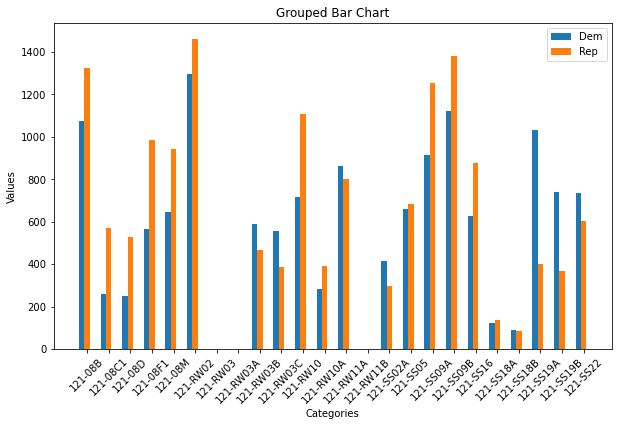

In [26]:
x = np.arange(len(district_53_precincts['UNIQUE_ID']))

# Width of bars
width = .25

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height here

rects1 = ax.bar(x - width, district_53_precincts['GSL053DCOF'], width, label='Dem')
rects2 = ax.bar(x, district_53_precincts['GSL053RSIL'], width, label='Rep')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart')
ax.set_xticks(x)
ax.set_xticklabels(district_53_precincts['UNIQUE_ID'])
ax.legend()

plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees


# Display the chart
plt.show()

In [27]:
shapefile_path = '/Users/geoffrey/Downloads/Voting_Precincts/Voting_Precincts.shp'
gdf = gpd.read_file(shapefile_path)

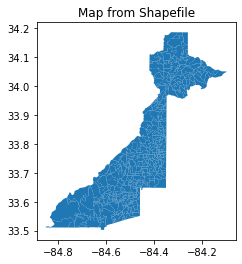

In [28]:


# Load the shapefile


# Plot the shapefile
gdf.plot()

# Add a title and display the map
plt.title('Map from Shapefile')
plt.show()


In [29]:
gdf.head()

,OBJECTID,ProposalNo,Status,RetireStat,VoterDist,TurnOut,ActVoters,PrecinctN,Shape__Are,Shape__Len,geometry
0,2,None,approved,active,MP01,None,None,None,1.314685e+07,16995.704454,"POLYGON ((-84.41879 34.07842, -84.41868 34.080..."
1,3,None,approved,active,RW02,None,None,None,7.035042e+07,41100.366211,"POLYGON ((-84.39727 34.02854, -84.39714 34.028..."
2,4,None,approved,active,SS26,None,None,None,2.107968e+07,19089.860095,"POLYGON ((-84.35387 33.97499, -84.35381 33.974..."
3,5,None,approved,active,SS16,None,None,None,7.065888e+07,46757.567059,"POLYGON ((-84.40388 33.94268, -84.40403 33.942..."
4,7,None,approved,active,JC09,None,None,None,2.874203e+07,30604.445436,"POLYGON ((-84.21046 34.04795, -84.21064 34.047..."


In [30]:
district_53_precincts.head()

,UNIQUE_ID,precinct,GSL053DCOF,GSL053RSIL,G22A01NO,G22A01YES,G22A02NO,G22A02YES,G22GOVDABR,G22GOVRKEM,G22GOVLHAZ,GCON05DWIL,GCON05RZIM,GSU06DEST,GSU06RGLA,G22USSDWAR,G22USSRWAL,SHD53_DEM_PCT
1289,121-08B,08B,1076,1323,222,2121,202,2170,1036,1402,7,1111,1278,1089,1301,1268,1099,0.448520
1291,121-08C1,08C1,261,571,68,732,100,709,243,592,6,283,543,278,553,335,472,0.313702
1292,121-08D,08D,249,528,65,680,73,676,238,543,6,261,509,254,518,310,449,0.320463
1294,121-08F1,08F1,568,984,129,1377,176,1345,543,1038,9,592,960,581,973,730,795,0.365979
1301,121-08M,08M,648,945,130,1429,159,1410,621,987,10,669,921,666,924,762,796,0.406780


In [31]:
district_53_precincts.dtypes

UNIQUE_ID         object
precinct          object
GSL053DCOF         int64
GSL053RSIL         int64
G22A01NO           int64
G22A01YES          int64
G22A02NO           int64
G22A02YES          int64
G22GOVDABR         int64
G22GOVRKEM         int64
G22GOVLHAZ         int64
GCON05DWIL         int64
GCON05RZIM         int64
GSU06DEST          int64
GSU06RGLA          int64
G22USSDWAR         int64
G22USSRWAL         int64
SHD53_DEM_PCT    float64
dtype: object

In [32]:
gdf.dtypes

OBJECTID         int64
ProposalNo      object
Status          object
RetireStat      object
VoterDist       object
TurnOut         object
ActVoters       object
PrecinctN       object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [33]:
mapping_data = gdf.merge(district_53_precincts, left_on='VoterDist', right_on='precinct')
mapping_data.head()

,OBJECTID,ProposalNo,Status,RetireStat,VoterDist,TurnOut,ActVoters,PrecinctN,Shape__Are,Shape__Len,geometry,UNIQUE_ID,precinct,GSL053DCOF,GSL053RSIL,G22A01NO,G22A01YES,G22A02NO,G22A02YES,G22GOVDABR,G22GOVRKEM,G22GOVLHAZ,GCON05DWIL,GCON05RZIM,GSU06DEST,GSU06RGLA,G22USSDWAR,G22USSRWAL,SHD53_DEM_PCT
0,3,None,approved,active,RW02,None,None,None,7.035042e+07,41100.366211,"POLYGON ((-84.39727 34.02854, -84.39714 34.028...",121-RW02,RW02,1296,1463,235,2460,203,2520,1234,1533,33,0,0,0,0,1427,1256,0.469735
1,5,None,approved,active,SS16,None,None,None,7.065888e+07,46757.567059,"POLYGON ((-84.40388 33.94268, -84.40403 33.942...",121-SS16,SS16,628,877,131,1322,123,1339,611,890,11,681,818,648,841,757,699,0.417276
2,62,72/12R,approved,active,08F1,None,None,None,4.068528e+07,31783.741050,"POLYGON ((-84.39663 33.84420, -84.39739 33.842...",121-08F1,08F1,568,984,129,1377,176,1345,543,1038,9,592,960,581,973,730,795,0.365979
3,70,106/12R,approved,active,SS19B,None,None,None,2.990158e+07,25283.706102,"POLYGON ((-84.38476 33.95749, -84.38475 33.957...",121-SS19B,SS19B,742,369,119,986,72,1036,726,388,8,0,0,0,0,789,304,0.667867
4,71,106/12R,approved,active,SS19A,None,None,None,2.805884e+07,27857.389159,"POLYGON ((-84.36108 33.96874, -84.36108 33.968...",121-SS19A,SS19A,1032,402,139,1278,73,1352,1024,418,16,0,0,0,0,1078,344,0.719665


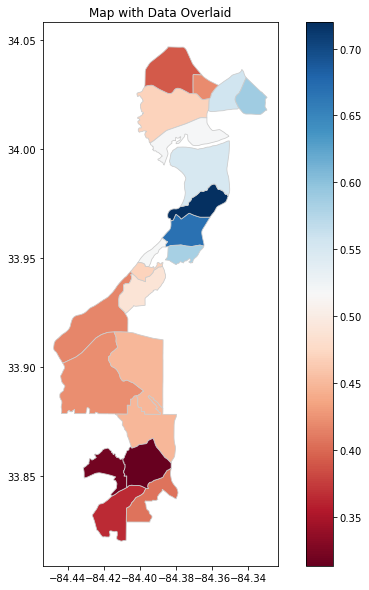

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))

# You can color the map based on a specific column, e.g., 'voter turnout'
mapping_data.plot(column='SHD53_DEM_PCT', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title and display the map
plt.title('Map with Data Overlaid')
plt.show()

In [35]:
district_53_precincts['GOV_DEM_PCT'] = district_53_precincts['G22GOVDABR']/(district_53_precincts['G22GOVDABR']+district_53_precincts['G22GOVLHAZ']+district_53_precincts['G22GOVRKEM'])

In [36]:
mapping_data['GOV_DEM_PCT'] = mapping_data['G22GOVDABR']/(mapping_data['G22GOVDABR']+mapping_data['G22GOVLHAZ']+mapping_data['G22GOVRKEM'])

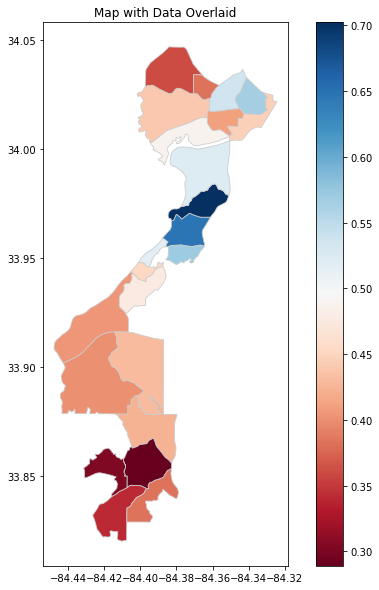

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))

# You can color the map based on a specific column, e.g., 'voter turnout'
mapping_data.plot(column='GOV_DEM_PCT', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title and display the map
plt.title('Map with Data Overlaid')
plt.show()

In [38]:
mapping_data['DEM_SH53_GOV_DIFF'] = mapping_data['SHD53_DEM_PCT'] - mapping_data['GOV_DEM_PCT']

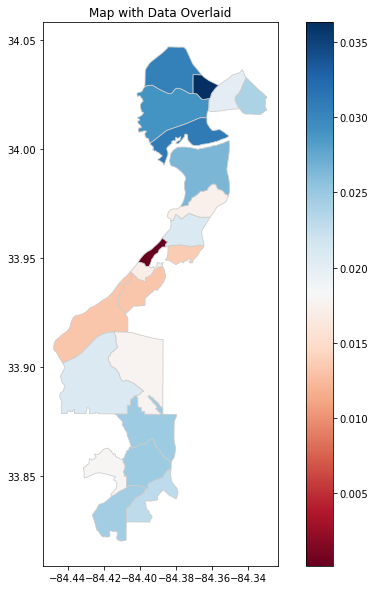

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))

# You can color the map based on a specific column, e.g., 'voter turnout'
mapping_data.plot(column='DEM_SH53_GOV_DIFF', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title and display the map
plt.title('Map with Data Overlaid')
plt.show()

In [40]:
mapping_data['DEM_SH53_GOV_DIFF']

0     0.029021
1     0.013175
2     0.024470
3     0.020808
4     0.017333
5     0.022972
6     0.013182
7     0.024798
8     0.018049
9     0.013592
10    0.026496
11    0.000192
12         NaN
13    0.031011
14    0.020974
15    0.017748
16    0.024760
17    0.020102
18         NaN
19    0.023983
20         NaN
21    0.030615
22    0.036296
23    0.016994
Name: DEM_SH53_GOV_DIFF, dtype: float64

In [41]:
mapping_data['TOTAL_SH53_VOTES'] = mapping_data['GSL053DCOF'] + mapping_data['GSL053RSIL']
mapping_data['TOTAL_GOV_VOTES'] = mapping_data['G22GOVLHAZ'] + mapping_data['G22GOVRKEM'] + mapping_data['G22GOVDABR']


In [42]:
sum(mapping_data['TOTAL_GOV_VOTES'])

29777

In [43]:
sum(mapping_data['TOTAL_SH53_VOTES'])

28636

## Census Tracts

In [44]:
shapefile_path = '/Users/geoffrey/Downloads/tl_2023_13_tract/tl_2023_13_tract.shp'
gdf = gpd.read_file(shapefile_path)

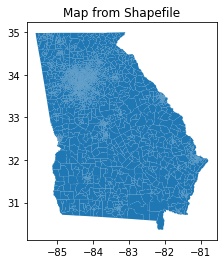

In [45]:


# Load the shapefile


# Plot the shapefile
gdf.plot()

# Add a title and display the map
plt.title('Map from Shapefile')
plt.show()


In [46]:
gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,13,153,020108,13153020108,1400000US13153020108,201.08,Census Tract 201.08,G5020,S,10731797,65357,+32.6404762,-083.6768373,"POLYGON ((-83.69865 32.65946, -83.69847 32.659..."
1,13,245,010802,13245010802,1400000US13245010802,108.02,Census Tract 108.02,G5020,S,169005435,953641,+33.3573770,-082.2220034,"POLYGON ((-82.35350 33.31232, -82.35030 33.314..."
2,13,245,010801,13245010801,1400000US13245010801,108.01,Census Tract 108.01,G5020,S,9917792,30634,+33.4165535,-082.1139478,"POLYGON ((-82.13548 33.41779, -82.13547 33.418..."
3,13,245,011100,13245011100,1400000US13245011100,111,Census Tract 111,G5020,S,2380558,0,+33.4592649,-081.9821423,"POLYGON ((-81.99417 33.46532, -81.99373 33.466..."
4,13,089,023315,13089023315,1400000US13089023315,233.15,Census Tract 233.15,G5020,S,23306088,363434,+33.7541928,-084.0660228,"POLYGON ((-84.10822 33.75883, -84.10819 33.759..."


In [47]:
gdf['GEOID'] = gdf['GEOID'].astype(int)

In [48]:
gdf.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID          int64
GEOIDFQ       object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [49]:
mapping_data_tracts = gdf.merge(district_53_census_tracts, left_on='GEOID', right_on='GEOID')
mapping_data_tracts.head()

,STATEFP_x,COUNTYFP_x,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,STATEFP_y,STATE,COUNTYFP_y,COUNTY,MEDN_INC22,TOT_HOUS22,LESS_10K22,10K_15K22,15K_20K22,20K_25K22,25K_30K22,30K_35K22,35K_40K22,40K_45K22,45K_50K22,50K_60K22,60K_75K22,75K_100K22,100_125K22,125_150K22,150_200K22,200K_MOR22
0,13,121,009802,13121009802,1400000US13121009802,98.02,Census Tract 98.02,G5020,S,10585475,198819,+33.8636555,-084.4250506,"POLYGON ((-84.45399 33.86773, -84.45369 33.867...",13,Georgia,121,Fulton County,178594.0,1731,0,10,24,7,44,13,32,46,21,192,63,137,82,50,194,816
1,13,121,011423,13121011423,1400000US13121011423,114.23,Census Tract 114.23,G5020,S,6459868,77298,+34.0212455,-084.3909990,"POLYGON ((-84.40167 34.02534, -84.40163 34.025...",13,Georgia,121,Fulton County,153720.0,2254,30,55,27,28,113,0,91,27,17,31,232,138,132,186,278,869
2,13,121,010211,13121010211,1400000US13121010211,102.11,Census Tract 102.11,G5020,S,3831228,31848,+33.8812684,-084.3956762,"POLYGON ((-84.41227 33.87733, -84.41210 33.877...",13,Georgia,121,Fulton County,198182.0,1436,7,0,0,12,23,32,0,9,10,28,74,115,140,71,205,710
3,13,121,009900,13121009900,1400000US13121009900,99,Census Tract 99,G5020,S,7759910,55070,+33.8613359,-084.3918503,"POLYGON ((-84.40878 33.87216, -84.40806 33.872...",13,Georgia,121,Fulton County,180500.0,2084,21,30,0,11,56,24,25,72,14,93,78,236,124,196,104,1000
4,13,121,010222,13121010222,1400000US13121010222,102.22,Census Tract 102.22,G5020,S,5708881,18436,+33.9001488,-084.4052695,"POLYGON ((-84.41982 33.89263, -84.41968 33.892...",13,Georgia,121,Fulton County,197250.0,931,56,0,0,0,0,0,22,28,13,11,13,45,47,132,99,465


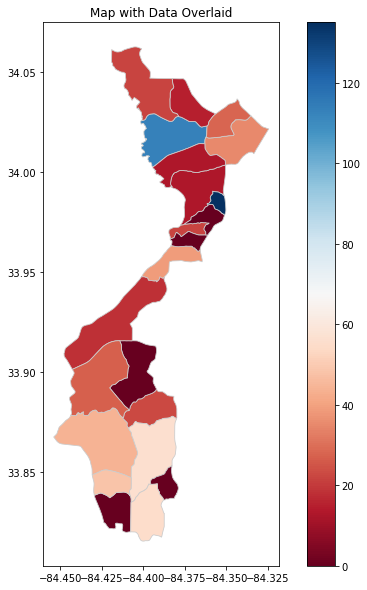

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))

# You can color the map based on a specific column, e.g., 'voter turnout'
mapping_data_tracts.plot(column='25K_30K22', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title and display the map
plt.title('Map with Data Overlaid')
plt.show()

## Age Data

In [51]:
dhc_data = pd.read_csv("/Users/geoffrey/Downloads/ga_dhc_2020_t/ga_dhc_2020_t.csv")

In [52]:
dhc_data_filtered = dhc_data[dhc_data['GEOID20'].isin(district_53_tracts)]


In [53]:
dhc_data_filtered.shape

(22, 90)

In [54]:
dhc_data_filtered.head()

,GEOID20,STATEFP20,STATE,COUNTYFP20,COUNTY,TOT_POP,URBAN,RURAL,NOT_DEF,MED_AGE,MED_AGE_M,MED_AGE_F,MALE,U5_M,5_9_M,10_14_M,15_17_M,18_19_M,20_M,21_M,22_24_M,25_29_M,30_34_M,35_39_M,40_44_M,45_49_M,50_54_M,55_59_M,60_61_M,62_64_M,65_66_M,67_69_M,70_74_M,75_79_M,80_84_M,85_O_M,FEMALE,U5_F,5_9_F,10_14_F,15_17_F,18_19_F,20_F,21_F,22_24_F,25_29_F,30_34_F,35_39_F,40_44_F,45_49_F,50_54_F,55_59_F,60_61_F,62_64_F,65_66_F,67_69_F,70_74_F,75_79_F,80_84_F,85_O_F,IN_HH_POP,HH_IN_HH,M_HH,M_ALONE,M_N_ALONE,F_HH,F_ALONE,F_N_ALONE,O_SEX_MAR,S_SEX_MAR,O_SEX_UMAR,S_SEX_UMAR,BIO_CHLD,BIO_U18,ADPT_CHLD,ADPT_U18,STEP_CHLD,STEP_U18,GRAND_CHLD,GRAND_U18,SIBLING,PARENT,PAR_INLAW,CHLD_INLAW,OTH_REL,FSTR_CHLD,OTH_NONREL,GRP_QUART,GRP_INST,GRP_N_INST
585,13121010204,13,Georgia,13121,Fulton County,5113,5113,0,0,45.3,44.6,45.7,2531,123,191,216,155,65,32,30,54,45,69,136,161,196,203,178,81,82,52,92,123,109,85,53,2582,131,204,208,106,60,16,30,41,54,96,150,162,214,199,177,86,103,69,89,147,122,74,44,5113,1805,985,94,891,820,151,669,1346,11,36,4,1657,1269,43,31,21,11,27,15,16,28,13,5,18,1,82,0,0,0
586,13121010211,13,Georgia,13121,Fulton County,3373,3373,0,0,40.3,39.5,41.0,1598,78,121,152,101,36,14,13,55,93,55,92,95,143,150,120,34,50,29,35,77,16,11,28,1775,79,111,156,98,36,19,18,66,102,73,107,108,151,163,107,47,60,32,45,56,48,44,49,3299,1265,593,112,481,672,223,449,745,11,47,8,1053,856,14,11,26,11,10,8,19,18,5,0,11,0,67,74,32,42
588,13121010213,13,Georgia,13121,Fulton County,1113,1113,0,0,31.4,31.6,31.3,527,28,35,21,12,8,5,6,33,86,90,50,37,24,20,24,8,13,5,12,7,0,2,1,586,37,25,19,6,7,1,7,49,122,71,65,43,23,33,22,7,13,12,6,6,4,1,7,1113,623,282,138,144,341,169,172,112,6,44,2,208,170,1,0,5,2,7,6,11,13,1,3,9,0,68,0,0,0
589,13121010214,13,Georgia,13121,Fulton County,1938,1938,0,0,39.4,37.2,41.4,864,25,32,29,11,10,4,4,67,116,94,71,55,49,49,39,14,10,9,22,27,29,28,70,1074,25,29,20,12,14,2,12,74,152,109,72,53,41,29,47,10,22,10,32,41,45,76,147,1938,1250,556,305,251,694,489,205,222,6,78,11,214,163,3,2,9,3,8,6,31,15,5,2,20,0,64,0,0,0
590,13121010215,13,Georgia,13121,Fulton County,1869,1869,0,0,44.2,43.0,44.5,889,39,30,40,29,25,12,9,34,54,73,58,52,53,47,76,23,35,34,35,57,39,26,9,980,41,25,34,31,25,12,6,36,71,80,68,67,65,68,86,37,39,21,34,62,33,20,19,1869,833,427,110,317,406,118,288,382,6,58,8,396,225,12,8,21,14,17,15,20,18,14,8,9,0,67,0,0,0


In [55]:
dhc_data_filtered['RURAL'].sum()

0

In [56]:
dhc_data_filtered['YW_2022'] = dhc_data_filtered['22_24_F']+dhc_data_filtered['21_F']+dhc_data_filtered['20_F']+dhc_data_filtered['18_19_F']+dhc_data_filtered['15_17_F']

<ipython-input-56-ad03f3bdcd5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dhc_data_filtered['YW_2022'] = dhc_data_filtered['22_24_F']+dhc_data_filtered['21_F']+dhc_data_filtered['20_F']+dhc_data_filtered['18_19_F']+dhc_data_filtered['15_17_F']


In [57]:
dhc_data_filtered['YW_2024'] = dhc_data_filtered['10_14_F']+dhc_data_filtered['18_19_F']+dhc_data_filtered['15_17_F']

<ipython-input-57-a12f4a675ace>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dhc_data_filtered['YW_2024'] = dhc_data_filtered['10_14_F']+dhc_data_filtered['18_19_F']+dhc_data_filtered['15_17_F']


In [58]:
dhc_data_filtered['YW_DIFF_22_24'] = dhc_data_filtered['YW_2024']-dhc_data_filtered['YW_2022']

<ipython-input-58-b08fd6950770>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dhc_data_filtered['YW_DIFF_22_24'] = dhc_data_filtered['YW_2024']-dhc_data_filtered['YW_2022']


In [59]:
dhc_data_filtered['YW_DIFF_22_24'].sum()

278

In [60]:
type(dhc_data_filtered)

pandas.core.frame.DataFrame

In [61]:
type(mapping_data_tracts)

geopandas.geodataframe.GeoDataFrame

In [62]:
buckhead_dummy = dhc_data_filtered[dhc_data_filtered['GEOID20']<13121010212]

In [63]:
mapping_data_tracts = mapping_data_tracts.merge(dhc_data_filtered, left_on='GEOID', right_on='GEOID20')
mapping_data_tracts.head()

,STATEFP_x,COUNTYFP_x,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,STATEFP_y,STATE_x,COUNTYFP_y,COUNTY_x,MEDN_INC22,TOT_HOUS22,LESS_10K22,10K_15K22,15K_20K22,20K_25K22,25K_30K22,30K_35K22,35K_40K22,40K_45K22,45K_50K22,50K_60K22,60K_75K22,75K_100K22,100_125K22,125_150K22,150_200K22,200K_MOR22,GEOID20,STATEFP20,STATE_y,COUNTYFP20,COUNTY_y,TOT_POP,URBAN,RURAL,NOT_DEF,MED_AGE,MED_AGE_M,MED_AGE_F,MALE,U5_M,5_9_M,10_14_M,15_17_M,18_19_M,20_M,21_M,22_24_M,25_29_M,30_34_M,35_39_M,40_44_M,45_49_M,50_54_M,55_59_M,60_61_M,62_64_M,65_66_M,67_69_M,70_74_M,75_79_M,80_84_M,85_O_M,FEMALE,U5_F,5_9_F,10_14_F,15_17_F,18_19_F,20_F,21_F,22_24_F,25_29_F,30_34_F,35_39_F,40_44_F,45_49_F,50_54_F,55_59_F,60_61_F,62_64_F,65_66_F,67_69_F,70_74_F,75_79_F,80_84_F,85_O_F,IN_HH_POP,HH_IN_HH,M_HH,M_ALONE,M_N_ALONE,F_HH,F_ALONE,F_N_ALONE,O_SEX_MAR,S_SEX_MAR,O_SEX_UMAR,S_SEX_UMAR,BIO_CHLD,BIO_U18,ADPT_CHLD,ADPT_U18,STEP_CHLD,STEP_U18,GRAND_CHLD,GRAND_U18,SIBLING,PARENT,PAR_INLAW,CHLD_INLAW,OTH_REL,FSTR_CHLD,OTH_NONREL,GRP_QUART,GRP_INST,GRP_N_INST,YW_2022,YW_2024,YW_DIFF_22_24
0,13,121,009802,13121009802,1400000US13121009802,98.02,Census Tract 98.02,G5020,S,10585475,198819,+33.8636555,-084.4250506,"POLYGON ((-84.45399 33.86773, -84.45369 33.867...",13,Georgia,121,Fulton County,178594.0,1731,0,10,24,7,44,13,32,46,21,192,63,137,82,50,194,816,13121009802,13,Georgia,13121,Fulton County,4154,4154,0,0,43.2,43.7,42.8,2013,86,138,144,125,70,36,20,47,100,70,90,124,164,177,157,58,53,42,60,87,86,41,38,2141,91,158,154,112,60,25,18,63,106,86,121,131,167,198,133,56,73,41,60,114,85,56,33,4154,1638,839,197,642,799,271,528,934,6,44,8,1309,954,39,23,21,6,18,15,20,34,8,3,17,0,55,0,0,0,278,326,48
1,13,121,011423,13121011423,1400000US13121011423,114.23,Census Tract 114.23,G5020,S,6459868,77298,+34.0212455,-084.3909990,"POLYGON ((-84.40167 34.02534, -84.40163 34.025...",13,Georgia,121,Fulton County,153720.0,2254,30,55,27,28,113,0,91,27,17,31,232,138,132,186,278,869,13121011423,13,Georgia,13121,Fulton County,5484,5484,0,0,39.5,38.9,40.0,2670,193,210,215,126,53,27,27,75,103,167,184,223,224,204,166,66,84,43,77,95,56,31,21,2814,190,211,217,121,64,21,23,74,93,179,215,250,221,200,183,65,74,55,87,112,86,39,34,5482,1962,1044,153,891,918,208,710,1231,11,73,4,1773,1378,40,24,43,22,51,37,39,60,16,11,39,3,126,2,0,2,303,402,99
2,13,121,010211,13121010211,1400000US13121010211,102.11,Census Tract 102.11,G5020,S,3831228,31848,+33.8812684,-084.3956762,"POLYGON ((-84.41227 33.87733, -84.41210 33.877...",13,Georgia,121,Fulton County,198182.0,1436,7,0,0,12,23,32,0,9,10,28,74,115,140,71,205,710,13121010211,13,Georgia,13121,Fulton County,3373,3373,0,0,40.3,39.5,41.0,1598,78,121,152,101,36,14,13,55,93,55,92,95,143,150,120,34,50,29,35,77,16,11,28,1775,79,111,156,98,36,19,18,66,102,73,107,108,151,163,107,47,60,32,45,56,48,44,49,3299,1265,593,112,481,672,223,449,745,11,47,8,1053,856,14,11,26,11,10,8,19,18,5,0,11,0,67,74,32,42,237,290,53
3,13,121,009900,13121009900,1400000US13121009900,99,Census Tract 99,G5020,S,7759910,55070,+33.8613359,-084.3918503,"POLYGON ((-84.40878 33.87216, -84.40806 33.872...",13,Georgia,121,Fulton County,180500.0,2084,21,30,0,11,56,24,25,72,14,93,78,236,124,196,104,1000,13121009900,13,Georgia,13121,Fulton County,5509,5509,0,0,37.9,36.1,39.5,2739,83,200,260,152,75,28,18,112,241,177,129,165,211,228,164,62,88,65,63,95,60,34,29,2770,104,166,228,134,61,23,35,110,202,174,160,193,246,227,181,67,77,35,69,122,73,37,46,5502,2362,1205,379,826,1157,465,692,1125,18,80,8,1597,1264,33,18,25,14,14,12,18,20,14,3,14,1,170,7,0,7,363,423,60
4,13,121,010222,13121010222,1400000US13121010222,102.22,Census Tract 102.22,G5020,S,5708881,18436,+33.9001488,-084.4052695,"POLYGON ((-84.41982 33.89263, -84.41968 33.892...",13,Georgia,121,Fulton County,197250.0,931,56,0,0,0,0,0,22,28,13,11,13,45,47,132,99,465,13121010222,13,Georgia,13121,Fulton County,2671,2671,0,0,48.0,48.3,47.8,1338,51,66,119,76,51,20,22,47,35,23,32,63,101,118,121,50,64,39,43,93,51,27,26,1333,39,73,10

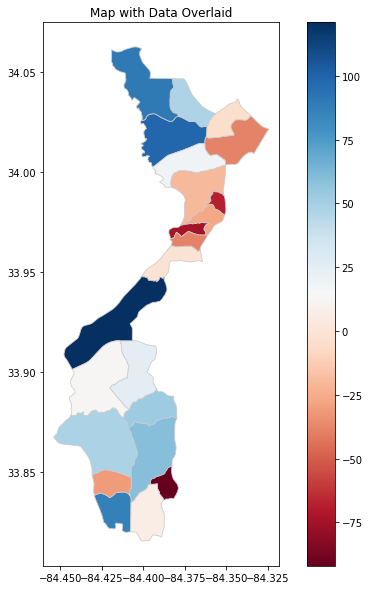

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))

# You can color the map based on a specific column, e.g., 'voter turnout'
mapping_data_tracts.plot(column='YW_DIFF_22_24', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title and display the map
plt.title('Map with Data Overlaid')
plt.show()

In [65]:
mapping_data_tracts['geometry']

0     POLYGON ((-84.45399 33.86773, -84.45369 33.867...
1     POLYGON ((-84.40167 34.02534, -84.40163 34.025...
2     POLYGON ((-84.41227 33.87733, -84.41210 33.877...
3     POLYGON ((-84.40878 33.87216, -84.40806 33.872...
4     POLYGON ((-84.41982 33.89263, -84.41968 33.892...
5     POLYGON ((-84.38354 33.99476, -84.38336 33.995...
6     POLYGON ((-84.40107 33.94787, -84.40095 33.948...
7     POLYGON ((-84.39568 33.84516, -84.39566 33.845...
8     POLYGON ((-84.42951 33.83857, -84.42923 33.838...
9     POLYGON ((-84.36290 34.01482, -84.36287 34.015...
10    POLYGON ((-84.44779 33.90930, -84.44779 33.909...
11    POLYGON ((-84.39430 34.00283, -84.39307 34.003...
12    POLYGON ((-84.40761 33.82041, -84.40761 33.820...
13    POLYGON ((-84.36148 33.98443, -84.36138 33.984...
14    POLYGON ((-84.38459 33.97026, -84.38456 33.970...
15    POLYGON ((-84.43080 33.84887, -84.43034 33.848...
16    POLYGON ((-84.44452 33.88700, -84.44449 33.887...
17    POLYGON ((-84.38399 34.03655, -84.38396 34

In [66]:
buckhead_dummy = mapping_data_tracts[
    (mapping_data_tracts['GEOID20'] < 13121010200) | 
    (mapping_data_tracts['GEOID20'] == 13121010211)
]


In [67]:
mapping_data_tracts['GEOID20'] == 13121010211

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
Name: GEOID20, dtype: bool

In [68]:
buckhead_dummy.head(1)

,STATEFP_x,COUNTYFP_x,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,STATEFP_y,STATE_x,COUNTYFP_y,COUNTY_x,MEDN_INC22,TOT_HOUS22,LESS_10K22,10K_15K22,15K_20K22,20K_25K22,25K_30K22,30K_35K22,35K_40K22,40K_45K22,45K_50K22,50K_60K22,60K_75K22,75K_100K22,100_125K22,125_150K22,150_200K22,200K_MOR22,GEOID20,STATEFP20,STATE_y,COUNTYFP20,COUNTY_y,TOT_POP,URBAN,RURAL,NOT_DEF,MED_AGE,MED_AGE_M,MED_AGE_F,MALE,U5_M,5_9_M,10_14_M,15_17_M,18_19_M,20_M,21_M,22_24_M,25_29_M,30_34_M,35_39_M,40_44_M,45_49_M,50_54_M,55_59_M,60_61_M,62_64_M,65_66_M,67_69_M,70_74_M,75_79_M,80_84_M,85_O_M,FEMALE,U5_F,5_9_F,10_14_F,15_17_F,18_19_F,20_F,21_F,22_24_F,25_29_F,30_34_F,35_39_F,40_44_F,45_49_F,50_54_F,55_59_F,60_61_F,62_64_F,65_66_F,67_69_F,70_74_F,75_79_F,80_84_F,85_O_F,IN_HH_POP,HH_IN_HH,M_HH,M_ALONE,M_N_ALONE,F_HH,F_ALONE,F_N_ALONE,O_SEX_MAR,S_SEX_MAR,O_SEX_UMAR,S_SEX_UMAR,BIO_CHLD,BIO_U18,ADPT_CHLD,ADPT_U18,STEP_CHLD,STEP_U18,GRAND_CHLD,GRAND_U18,SIBLING,PARENT,PAR_INLAW,CHLD_INLAW,OTH_REL,FSTR_CHLD,OTH_NONREL,GRP_QUART,GRP_INST,GRP_N_INST,YW_2022,YW_2024,YW_DIFF_22_24
0,13,121,009802,13121009802,1400000US13121009802,98.02,Census Tract 98.02,G5020,S,10585475,198819,+33.8636555,-084.4250506,"POLYGON ((-84.45399 33.86773, -84.45369 33.867...",13,Georgia,121,Fulton County,178594.0,1731,0,10,24,7,44,13,32,46,21,192,63,137,82,50,194,816,13121009802,13,Georgia,13121,Fulton County,4154,4154,0,0,43.2,43.7,42.8,2013,86,138,144,125,70,36,20,47,100,70,90,124,164,177,157,58,53,42,60,87,86,41,38,2141,91,158,154,112,60,25,18,63,106,86,121,131,167,198,133,56,73,41,60,114,85,56,33,4154,1638,839,197,642,799,271,528,934,6,44,8,1309,954,39,23,21,6,18,15,20,34,8,3,17,0,55,0,0,0,278,326,48


In [69]:
buckhead_dummy['YOUNG_PEOPLE_2022'] = buckhead_dummy['15_17_M']+buckhead_dummy['18_19_M']+buckhead_dummy['20_M']+buckhead_dummy['21_M']+buckhead_dummy['22_24_M']+buckhead_dummy['15_17_F']+buckhead_dummy['18_19_F']+buckhead_dummy['20_F']+buckhead_dummy['21_F']+buckhead_dummy['22_24_F']

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [70]:
buckhead_dummy['YOUNG_PEOPLE_2024'] = buckhead_dummy['15_17_M']+buckhead_dummy['18_19_M']+buckhead_dummy['20_M']+buckhead_dummy['21_M']+(.33*buckhead_dummy['10_14_M'])+(.67*buckhead_dummy['22_24_M'])+buckhead_dummy['15_17_F']+buckhead_dummy['18_19_F']+buckhead_dummy['20_F']+buckhead_dummy['21_F']+(.33*buckhead_dummy['10_14_M'])+(.67*buckhead_dummy['22_24_F'])

In [71]:
buckhead_dummy[['YOUNG_PEOPLE_2022','YOUNG_PEOPLE_2024']]

,YOUNG_PEOPLE_2022,YOUNG_PEOPLE_2024
0,576,634.74
2,456,516.39
3,748,846.34
7,364,318.13
8,314,398.15
12,531,563.34
15,367,385.81


In [72]:
buckhead_dummy['TOTAL_VOTERS_2024'] = buckhead_dummy['TOT_POP'] - buckhead_dummy['U5_M']- buckhead_dummy['5_9_M']- (.67*buckhead_dummy['10_14_M']) - buckhead_dummy['U5_F']- buckhead_dummy['5_9_F']- (.67*buckhead_dummy['10_14_F'])

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [73]:
buckhead_dummy['TOTAL_VOTERS_2022'] = buckhead_dummy['TOT_POP'] - buckhead_dummy['U5_M']- buckhead_dummy['5_9_M']- (buckhead_dummy['10_14_M']) - buckhead_dummy['U5_F']- buckhead_dummy['5_9_F']- (buckhead_dummy['10_14_F'])

In [74]:
buckhead_dummy['YOUNG_VOTER_PCT_2022'] = buckhead_dummy['YOUNG_PEOPLE_2022']/buckhead_dummy['TOTAL_VOTERS_2022'] 

In [75]:
buckhead_dummy['YOUNG_VOTER_PCT_2024'] = buckhead_dummy['YOUNG_PEOPLE_2024']/buckhead_dummy['TOTAL_VOTERS_2024'] 

In [76]:
buckhead_dummy[['YOUNG_VOTER_PCT_2022','YOUNG_VOTER_PCT_2024']]

,YOUNG_VOTER_PCT_2022,YOUNG_VOTER_PCT_2024
0,0.170263,0.182326
2,0.170404,0.185910
3,0.167413,0.182833
7,0.121051,0.104796
8,0.170838,0.206147
12,0.134909,0.140026
15,0.135926,0.140489


In [77]:
buckhead_dummy['GEOID']

0     13121009802
2     13121010211
3     13121009900
7     13121009504
8     13121009804
12    13121009501
15    13121009803
Name: GEOID, dtype: int64

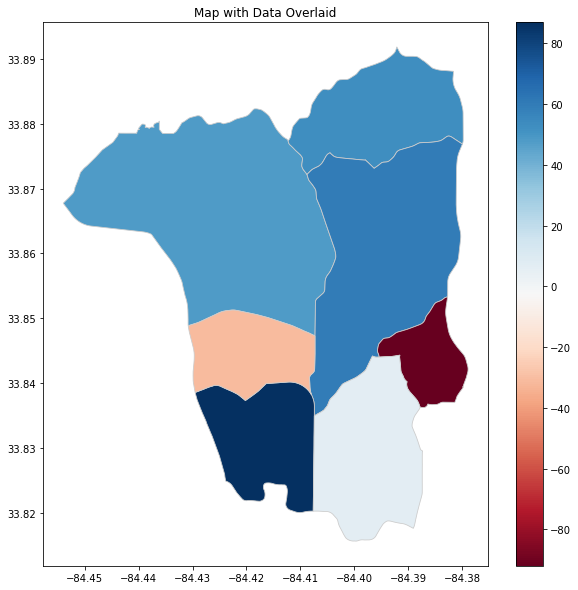

In [78]:
fig, ax = plt.subplots(figsize=(10, 10))

# You can color the map based on a specific column, e.g., 'voter turnout'
buckhead_dummy.plot(column='YW_DIFF_22_24', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title and display the map
plt.title('Map with Data Overlaid')
plt.show()

In [79]:
buckhead_dummy['YW_DIFF_22_24'].sum()

132

In [80]:
buckhead_precincts = mapping_data[
    (mapping_data['precinct'] == "08M") | 
    (mapping_data['precinct'] == "08F1")|
    (mapping_data['precinct'] == "08D") | 
    (mapping_data['precinct'] == "08C1")|
    (mapping_data['precinct'] == "08B")
]


In [81]:
non_buckhead_precincts = mapping_data[
    (mapping_data['precinct'] != "08M") & 
    (mapping_data['precinct'] != "08F1")&
    (mapping_data['precinct'] != "08D") & 
    (mapping_data['precinct'] != "08C1")&
    (mapping_data['precinct'] != "08B")
]


In [82]:
mapping_data.shape

(24, 33)

In [83]:
buckhead_precincts.shape

(5, 33)

In [84]:
non_buckhead_precincts.shape

(19, 33)

In [85]:
buckhead_precincts['REP_MARGIN'] = (1-buckhead_precincts['SHD53_DEM_PCT'])-(buckhead_precincts['SHD53_DEM_PCT'])

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


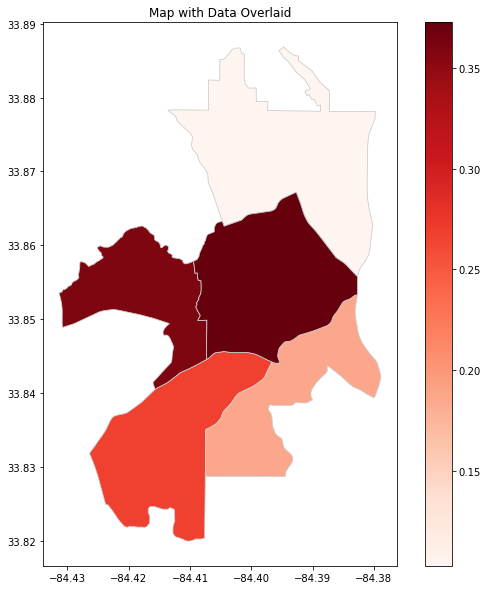

In [86]:
fig, ax = plt.subplots(figsize=(10, 10))

# You can color the map based on a specific column, e.g., 'voter turnout'
buckhead_precincts.plot(column='REP_MARGIN', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title and display the map
plt.title('Map with Data Overlaid')
plt.show()

In [87]:
buckhead_precincts['GSL053DCOF'].sum()

2802

In [88]:
buckhead_precincts['GSL053RSIL'].sum()

4351

In [89]:
non_buckhead_precincts['GSL053DCOF'].sum()

10770

In [90]:
non_buckhead_precincts['GSL053RSIL'].sum()

10713

In [91]:
10770/(10770+10713)-(1-10770/(10770+10713))

0.0026532607177769396

In [92]:
2802/(2802+4351)-(1-(2802/(2802+4351)))

-0.2165524954564519

In [93]:
buckhead_dummy['YOUNG_PEOPLE_2022'].sum()/buckhead_dummy['TOTAL_VOTERS_2022'].sum()

0.1524900036350418

In [94]:
buckhead_dummy['YOUNG_PEOPLE_2024'].sum()/buckhead_dummy['TOTAL_VOTERS_2024'].sum()

0.16190013984876536

In [95]:
mapping_data_tracts['YOUNG_PEOPLE_2024'] = mapping_data_tracts['15_17_M']+mapping_data_tracts['18_19_M']+mapping_data_tracts['20_M']+mapping_data_tracts['21_M']+(.33*mapping_data_tracts['10_14_M'])+(.67*mapping_data_tracts['22_24_M'])+mapping_data_tracts['15_17_F']+mapping_data_tracts['18_19_F']+mapping_data_tracts['20_F']+mapping_data_tracts['21_F']+(.33*mapping_data_tracts['10_14_M'])+(.67*mapping_data_tracts['22_24_F'])

In [96]:
mapping_data_tracts['TOTAL_VOTERS_2024'] = mapping_data_tracts['TOT_POP'] - mapping_data_tracts['U5_M']- mapping_data_tracts['5_9_M']- (.67*mapping_data_tracts['10_14_M']) - mapping_data_tracts['U5_F']- mapping_data_tracts['5_9_F']- (.67*mapping_data_tracts['10_14_F'])

In [97]:
mapping_data_tracts['YOUNG_VOTER_PCT_2024'] = mapping_data_tracts['YOUNG_PEOPLE_2024']/mapping_data_tracts['TOTAL_VOTERS_2024'] 

In [98]:
mapping_data_tracts['YOUNG_VOTER_PCT_2024'].mean()

0.14977114375020165

In [99]:
non_buckhead_dummy = mapping_data_tracts[
    (mapping_data_tracts['GEOID20'] > 13121010200)
  &     (mapping_data_tracts['GEOID20'] != 13121010211)
]

In [101]:
non_buckhead_dummy['YOUNG_VOTER_PCT_2024'].mean()

0.14349595748298075

In [102]:
non_buckhead_dummy.shape

(15, 132)

In [103]:
mapping_data_tracts.shape

(22, 132)

In [104]:
buckhead_dummy.shape

(7, 135)

In [105]:
buckhead_dummy['YOUNG_PEOPLE_2022'].sum()

3356

In [106]:
buckhead_dummy['YOUNG_PEOPLE_2024'].sum()

3662.9000000000005

In [107]:
non_buckhead_dummy['YOUNG_PEOPLE_2024'].sum()

5798.02

In [108]:
buckhead_dummy['YOUNG_PEOPLE_2024'].sum()+non_buckhead_dummy['YOUNG_PEOPLE_2024'].sum()

9460.920000000002

In [109]:
non_buckhead_dummy['YOUNG_PEOPLE_2022'] = non_buckhead_dummy['15_17_M']+non_buckhead_dummy['18_19_M']+non_buckhead_dummy['20_M']+non_buckhead_dummy['21_M']+non_buckhead_dummy['22_24_M']+non_buckhead_dummy['15_17_F']+non_buckhead_dummy['18_19_F']+non_buckhead_dummy['20_F']+non_buckhead_dummy['21_F']+non_buckhead_dummy['22_24_F']

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [110]:
non_buckhead_dummy['YOUNG_PEOPLE_2022'].sum()

5338

In [111]:
non_buckhead_dummy['TOTAL_VOTERS_2022'] = non_buckhead_dummy['TOT_POP'] - non_buckhead_dummy['U5_M']- non_buckhead_dummy['5_9_M']- (non_buckhead_dummy['10_14_M']) - non_buckhead_dummy['U5_F']- non_buckhead_dummy['5_9_F']- (non_buckhead_dummy['10_14_F'])

In [112]:
non_buckhead_dummy['YOUNG_VOTER_PCT_2022'] = non_buckhead_dummy['YOUNG_PEOPLE_2022']/non_buckhead_dummy['TOTAL_VOTERS_2022'] 

In [113]:
non_buckhead_dummy['YOUNG_VOTER_PCT_2024'].mean()-non_buckhead_dummy['YOUNG_VOTER_PCT_2022'].mean()

0.005144577179437226

In [114]:
buckhead_dummy['YOUNG_VOTER_PCT_2024'].mean()-buckhead_dummy['YOUNG_VOTER_PCT_2022'].mean()

0.01024617272156389

## Data Exploration

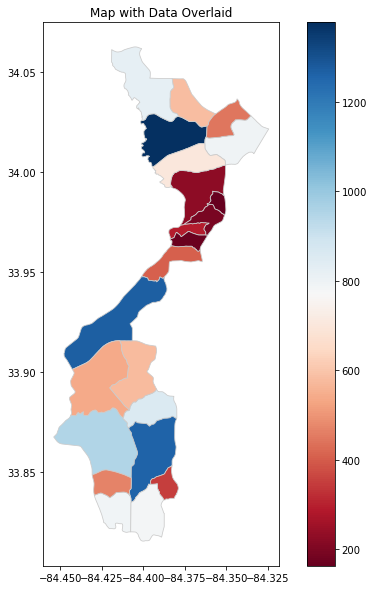

In [115]:
fig, ax = plt.subplots(figsize=(10, 10))

# You can color the map based on a specific column, e.g., 'voter turnout'
mapping_data_tracts.plot(column='BIO_U18', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title and display the map
plt.title('Map with Data Overlaid')
plt.show()

In [116]:
mapping_data_tracts.head(1)

,STATEFP_x,COUNTYFP_x,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,STATEFP_y,STATE_x,COUNTYFP_y,COUNTY_x,MEDN_INC22,TOT_HOUS22,LESS_10K22,10K_15K22,15K_20K22,20K_25K22,25K_30K22,30K_35K22,35K_40K22,40K_45K22,45K_50K22,50K_60K22,60K_75K22,75K_100K22,100_125K22,125_150K22,150_200K22,200K_MOR22,GEOID20,STATEFP20,STATE_y,COUNTYFP20,COUNTY_y,TOT_POP,URBAN,RURAL,NOT_DEF,MED_AGE,MED_AGE_M,MED_AGE_F,MALE,U5_M,5_9_M,10_14_M,15_17_M,18_19_M,20_M,21_M,22_24_M,25_29_M,30_34_M,35_39_M,40_44_M,45_49_M,50_54_M,55_59_M,60_61_M,62_64_M,65_66_M,67_69_M,70_74_M,75_79_M,80_84_M,85_O_M,FEMALE,U5_F,5_9_F,10_14_F,15_17_F,18_19_F,20_F,21_F,22_24_F,25_29_F,30_34_F,35_39_F,40_44_F,45_49_F,50_54_F,55_59_F,60_61_F,62_64_F,65_66_F,67_69_F,70_74_F,75_79_F,80_84_F,85_O_F,IN_HH_POP,HH_IN_HH,M_HH,M_ALONE,M_N_ALONE,F_HH,F_ALONE,F_N_ALONE,O_SEX_MAR,S_SEX_MAR,O_SEX_UMAR,S_SEX_UMAR,BIO_CHLD,BIO_U18,ADPT_CHLD,ADPT_U18,STEP_CHLD,STEP_U18,GRAND_CHLD,GRAND_U18,SIBLING,PARENT,PAR_INLAW,CHLD_INLAW,OTH_REL,FSTR_CHLD,OTH_NONREL,GRP_QUART,GRP_INST,GRP_N_INST,YW_2022,YW_2024,YW_DIFF_22_24,YOUNG_PEOPLE_2024,TOTAL_VOTERS_2024,YOUNG_VOTER_PCT_2024
0,13,121,009802,13121009802,1400000US13121009802,98.02,Census Tract 98.02,G5020,S,10585475,198819,+33.8636555,-084.4250506,"POLYGON ((-84.45399 33.86773, -84.45369 33.867...",13,Georgia,121,Fulton County,178594.0,1731,0,10,24,7,44,13,32,46,21,192,63,137,82,50,194,816,13121009802,13,Georgia,13121,Fulton County,4154,4154,0,0,43.2,43.7,42.8,2013,86,138,144,125,70,36,20,47,100,70,90,124,164,177,157,58,53,42,60,87,86,41,38,2141,91,158,154,112,60,25,18,63,106,86,121,131,167,198,133,56,73,41,60,114,85,56,33,4154,1638,839,197,642,799,271,528,934,6,44,8,1309,954,39,23,21,6,18,15,20,34,8,3,17,0,55,0,0,0,278,326,48,634.74,3481.34,0.182326


KeyError: 'HH_PCT_CHLD_U18'

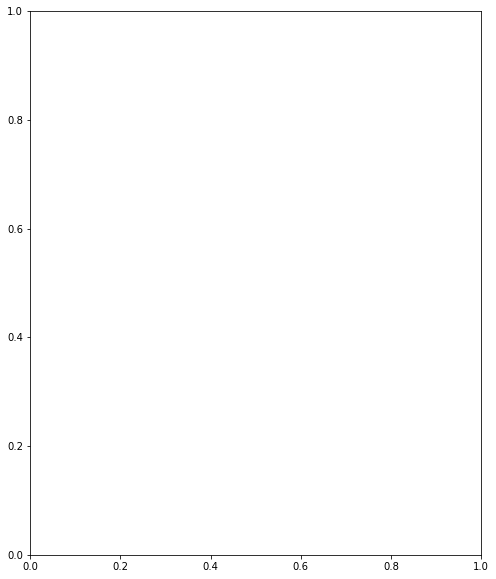

In [117]:
fig, ax = plt.subplots(figsize=(10, 10))

# You can color the map based on a specific column, e.g., 'voter turnout'
mapping_data_tracts.plot(column='HH_PCT_CHLD_U18', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title and display the map
plt.title('Map with Data Overlaid')
plt.show()

In [ ]:
mapping_data_tracts['HH_PCT_CHLD_U18'] = mapping_data_tracts['BIO_U18']/mapping_data_tracts['BIO_CHLD']

In [ ]:
mapping_data_tracts[mapping_data_tracts['HH_PCT_CHLD_U18']>.78]

## Education Angle

In [ ]:
mapping_data.loc[(mapping_data['precinct']=="08F1")|(mapping_data['precinct']=="08C1")|(mapping_data['precinct']=="08B")
                 #|(mapping_data['precinct']=="SS19B")
                 ,"GSL053DCOF"].sum()

In [118]:
mapping_data.loc[(mapping_data['precinct']=="08F1")|(mapping_data['precinct']=="08C1")|(mapping_data['precinct']=="08B")
                 #|(mapping_data['precinct']=="SS19B")
                 ,"GSL053RSIL"].sum()

2878

In [119]:
2647/(2647+3247)-(1-(2647/(2647+3247)))

-0.1017984390906006

In [120]:
1905/(1905+2878)-(1-(1905/(1905+2878)))

-0.2034288103700606

## Voter History Data Exploration

In [122]:
voter_history_data = pd.read_csv("/Users/geoffrey/Downloads/2024.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [123]:
voter_history_data.head()

,County Name,Voter Registration Number,Election Date,Election Type,Party,Ballot Style,Absentee,Provisional,Supplemental
0,DOOLY,8359339,01/02/2024,SPECIAL ELECTION RUNOFF,NaN,ABSENTEE BY MAIL,Y,NaN,N
1,DOOLY,6338935,01/02/2024,SPECIAL ELECTION RUNOFF,NaN,ABSENTEE BY MAIL,Y,NaN,N
2,DOOLY,603912,01/02/2024,SPECIAL ELECTION RUNOFF,NaN,ABSENTEE BY MAIL,Y,NaN,N
3,DOOLY,4319397,01/02/2024,SPECIAL ELECTION RUNOFF,NaN,ABSENTEE BY MAIL,Y,NaN,N
4,DOOLY,604166,01/02/2024,SPECIAL ELECTION RUNOFF,NaN,ABSENTEE BY MAIL,Y,NaN,N


In [124]:
voter_history_data['Party'].value_counts()

REPUBLICAN      1416094
DEMOCRAT        1030016
NON-PARTISAN      40146
Name: Party, dtype: int64

In [ ]:
voter_history_data['Party'].value_counts()

In [125]:
 voter_history_data.isna().sum()


County Name                       11
Voter Registration Number          0
Election Date                      0
Election Type                     20
Party                          38089
Ballot Style                       0
Absentee                           0
Provisional                  1161957
Supplemental                       0
dtype: int64